# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


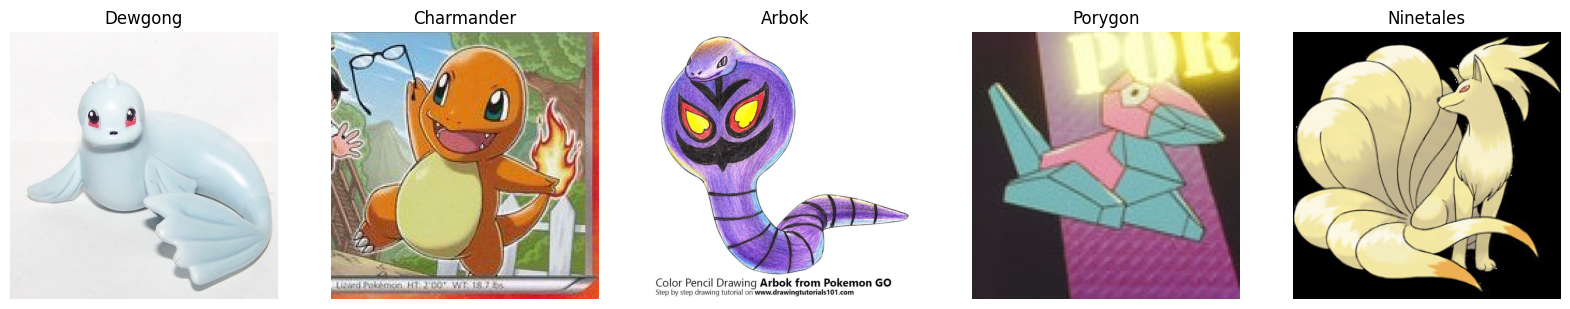

In [1]:
# Start off by randomly picking images from the training set and displaying them with a Unknown label at the bottom
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

training_directory = 'data/training_set'
testing_directory = 'data/testing_set'

#plot 5 Pokemon as subplots together, turn off axis, normal colors
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [2]:
from PIL import Image
#use sklearn to create  CNN
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#create sklearn model to classify pokemon images
model = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100), 
    max_iter=500, 
    alpha=0.0001, 
    solver='sgd',
    verbose=10, 
    random_state=21, 
    tol=0.000000001
)

#create dataset for model to train on from images in training_set
dataset = []
for pokemon in os.listdir(training_directory):
    for image in os.listdir(training_directory + '/' + pokemon):
        img = Image.open(training_directory + '/' + pokemon + '/' + image)
        dataset.append((img, pokemon))
        
print(f"Number of images in dataset: {len(dataset)}")

#split dataset into training and testing sets
X = [i[0] for i in dataset]
y = [i[1] for i in dataset]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f"split datasets into training and testing sets")
#train model
model.fit(X_train, y_train)
print(f"model trained")

#predict on test set
predictions = model.predict(X_test)
print(f"model predictions: {predictions}")

#print images and predictions
fig, ax = plt.subplots(1, 5, figsize=(20, 20))

for i in range(5):
    random_pokemon = random.choice(os.listdir(testing_directory))
    random_pokemon_image = random.choice(os.listdir(testing_directory + '/' + random_pokemon))
    img = mpimg.imread(testing_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title('Actual: ' + random_pokemon + '\nPredicted: ' + predictions[i])
    ax[i].axis('off')
    ax[i].imshow(img)






ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5112,) + inhomogeneous part.